In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("DeanSautmann-WBER-HealthOutcomesMali (1).csv")

In [3]:
df.head()

,FPrimary,Person_ID,compound,Mother_ID,surveyor_ID,survey_date,consent,child_consent_,TrtOrder,TrtOrder2013,...,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,MUAC_danger,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
0,301,102,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,3,0,0,0.0,0,0,0,0,1,1
1,301,101,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,0,0,0,NaN,0,0,0,1,0,0
2,601,101,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0.0,1,1,1,1,0,1
3,602,105,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,NaN,1,1,1,0,1,1
4,602,310,6,300,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0.0,1,0,1,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Columns: 243 entries, FPrimary to tag_M
dtypes: float64(196), int64(39), object(8)
memory usage: 3.1+ MB


In [5]:
df.describe()

,FPrimary,Person_ID,compound,Mother_ID,surveyor_ID,consent,child_consent_,TrtOrder,TrtOrder2013,Treatment1,...,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,MUAC_danger,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
count,1652.000000,1652.00000,1652.000000,1652.000000,1652.000000,1651.0,1573.000000,1649.000000,1567.000000,1649.000000,...,1652.000000,1652.000000,1652.000000,1062.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,49753.807506,374.41707,497.510896,361.622276,23.495763,1.0,7.652893,2.503335,2.507339,0.254700,...,0.449758,0.008475,0.044189,0.016008,0.747579,0.577482,0.401937,0.546610,0.354722,0.616828
std,66323.926204,1076.48909,663.237635,1062.061711,8.766676,0.0,2.841495,1.127285,1.131141,0.435825,...,1.390203,0.091694,0.205577,0.125563,0.434533,0.494110,0.490438,0.497973,0.478574,0.486307
min,301.000000,101.00000,3.000000,0.000000,4.000000,1.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23202.000000,101.00000,232.000000,100.000000,15.000000,1.0,9.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40451.500000,103.00000,404.500000,100.000000,23.000000,1.0,9.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,58504.250000,131.00000,585.000000,100.000000,32.000000,1.0,9.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,580201.000000,5650.00000,5802.000000,5600.000000,40.000000,1.0,9.000000,4.000000,4.000000,1.000000,...,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
missing_percent = df.isna().mean()*100
missing_percent

FPrimary                        0.0
Person_ID                       0.0
compound                        0.0
Mother_ID                       0.0
surveyor_ID                     0.0
                               ... 
Months_breastfeeding_correct    0.0
ORT_ingr_correct                0.0
tag_HH                          0.0
tag_C                           0.0
tag_M                           0.0
Length: 243, dtype: float64

In [7]:
high_na_cols = missing_percent[missing_percent>30]
high_na_cols

vaccines_taken                45.096852
vaccines_taken_nocard         55.932203
health_program_name_          46.307506
health_program_name_other_    99.455206
health_program_benefit_       46.186441
                                ...    
WeightAge                     34.927361
MUAC                          34.866828
WeightAge_flag                34.927361
MUAC_flag                     34.866828
MUAC_danger                   35.714286
Length: 136, dtype: float64

In [8]:
df_after_dropping_nan_morethan_30 = df.drop(columns = high_na_cols.index)

In [9]:
df_after_dropping_nan_morethan_30

,FPrimary,Person_ID,compound,Mother_ID,surveyor_ID,survey_date,consent,child_consent_,TrtOrder,TrtOrder2013,...,Three_Stool_days_total,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
0,301,102,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,0,3,0,0,0,0,0,0,1,1
1,301,101,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,601,101,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0,1,1,1,1,0,1
3,602,105,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0,1,1,1,0,1,1
4,602,310,6,300,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,550201,5151,5502,5100,40,11/5/2014,1.0,NaN,4.0,4.0,...,0,0,0,0,1,1,1,0,0,1
1648,550201,5150,5502,5100,40,11/5/2014,1.0,NaN,4.0,4.0,...,0,0,0,0,1,1,1,1,1,0
1649,580101,5152,5801,5100,40,11/2/2014,1.0,NaN,3.0,3.0,...,0,0,0,0,1,1,0,0,1,1
1650,580101,5153,5801,5100,40,11/2/2014,1.0,NaN,3.0,NaN,...,0,0,0,0,1,1,0,1,0,0


In [10]:
df_after_dropping_nan_morethan_30.isna().sum()[df_after_dropping_nan_morethan_30.isna().sum()>0]

survey_date              4
consent                  1
child_consent_          79
TrtOrder                 3
TrtOrder2013            85
                        ..
Current_water_source     1
Aquatabs_used            2
Water_changed            7
weight                  14
muac                    18
Length: 65, dtype: int64

In [11]:
df_after_dropping_nan_morethan_30["survey_date"]=df_after_dropping_nan_morethan_30["survey_date"].ffill()

In [12]:
na_counts = df_after_dropping_nan_morethan_30.isna().sum()
dtypes = df_after_dropping_nan_morethan_30.dtypes
na_summary = pd.DataFrame({
    'na_count':na_counts,
    'dtype':dtypes
})

na_summary = na_summary[na_summary['na_count']>0]

In [13]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(na_summary)

                      na_count    dtype
consent                      1  float64
child_consent_              79  float64
TrtOrder                     3  float64
TrtOrder2013                85  float64
Treatment1                   3  float64
Treatment2                   3  float64
Treatment3                   3  float64
Treatment4                   3  float64
AttrStatus                  85  float64
same_compound                3  float64
same_mother                  1  float64
HHmembers_12                59  float64
GenderFA                    58  float64
LitFA                       56  float64
LangFA                      56  float64
SalaryFA                    56  float64
OOccupier                   99  float64
LogAssets                   99  float64
RelsFA                     101  float64
OldFA                       41  float64
dist1                       23  float64
Diarrhea_2013               18  float64
gender                       7  float64
health_program_              1  float64


In [14]:
float_with_na = na_summary[na_summary['dtype']=='float64'].index.tolist()
float_with_na

['consent',
 'child_consent_',
 'TrtOrder',
 'TrtOrder2013',
 'Treatment1',
 'Treatment2',
 'Treatment3',
 'Treatment4',
 'AttrStatus',
 'same_compound',
 'same_mother',
 'HHmembers_12',
 'GenderFA',
 'LitFA',
 'LangFA',
 'SalaryFA',
 'OOccupier',
 'LogAssets',
 'RelsFA',
 'OldFA',
 'dist1',
 'Diarrhea_2013',
 'gender',
 'health_program_',
 'free_care_check_',
 'MUAC_Unadjusted',
 'child_weighing_type_',
 'child_weight_1_',
 'child_weight_2_',
 'vaccine_card_',
 'Ill_day_1_',
 'Ill_day_2_',
 'Ill_day_3_',
 'Ill_day_4_',
 'Ill_day_5_',
 'Ill_day_6_',
 'Ill_day_7_',
 'Diarrhea_day_1_',
 'Diarrhea_day_2_',
 'Diarrhea_day_3_',
 'Diarrhea_day_4_',
 'Diarrhea_day_5_',
 'Diarrhea_day_6_',
 'Diarrhea_day_7_',
 'Blood_Stool_day_1_',
 'Blood_Stool_day_2_',
 'Blood_Stool_day_3_',
 'Blood_Stool_day_4_',
 'Blood_Stool_day_5_',
 'Blood_Stool_day_6_',
 'Blood_Stool_day_7_',
 'Three_Stool_day_1_',
 'Three_Stool_day_2_',
 'Three_Stool_day_3_',
 'Three_Stool_day_4_',
 'Three_Stool_day_5_',
 'Three_Stool

In [15]:
needtocheck = df_after_dropping_nan_morethan_30[float_with_na]
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df_after_dropping_nan_morethan_30[float_with_na].skew())

consent                  0.000000
child_consent_          -1.649629
TrtOrder                -0.007032
TrtOrder2013            -0.010267
Treatment1               1.127050
Treatment2               1.202242
Treatment3               1.171721
Treatment4               1.123385
AttrStatus              -8.257049
same_compound           -6.974203
same_mother             -6.367463
HHmembers_12             1.155430
GenderFA                -2.808463
LitFA                    0.050188
LangFA                  -0.793340
SalaryFA                 2.440653
OOccupier                0.130473
LogAssets               -0.486651
RelsFA                   0.000000
OldFA                    0.216224
dist1                   -1.629468
Diarrhea_2013            3.467345
gender                  -0.066968
health_program_         -0.159338
free_care_check_         0.598599
MUAC_Unadjusted         -0.887831
child_weighing_type_     2.894789
child_weight_1_          0.392725
child_weight_2_          0.386775
vaccine_card_ 

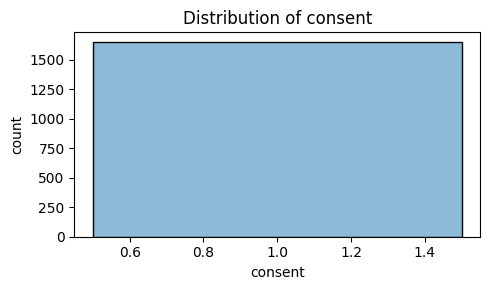

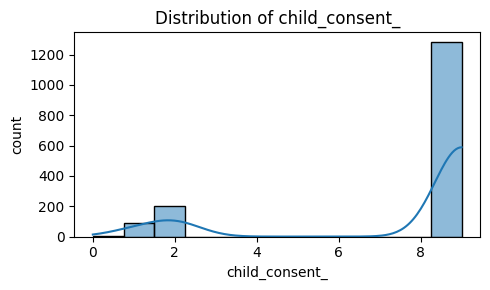

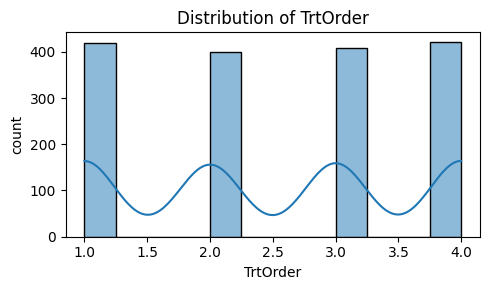

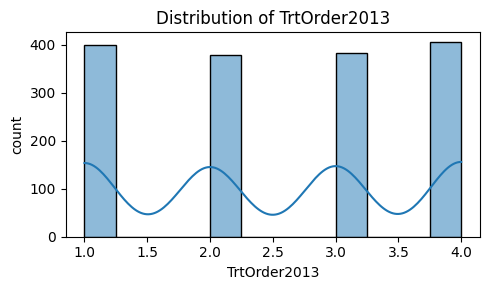

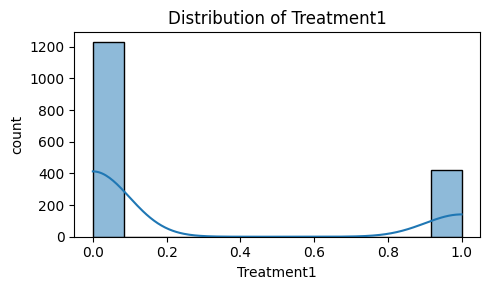

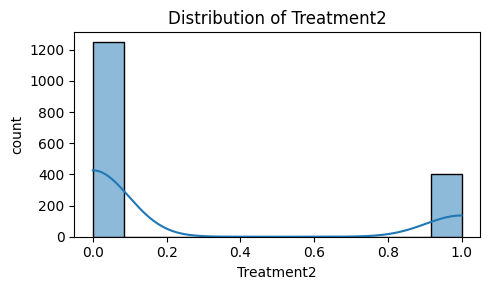

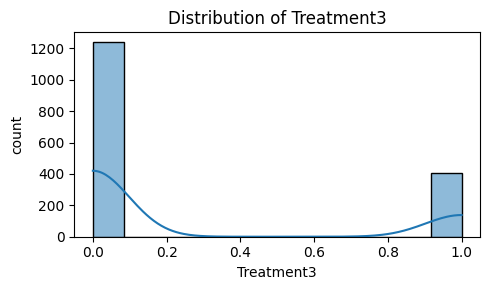

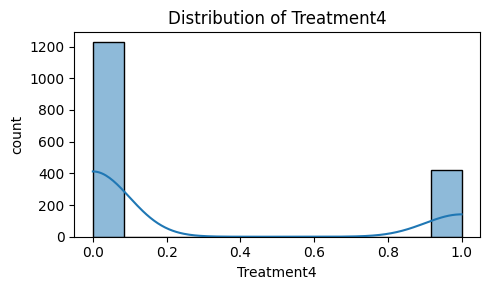

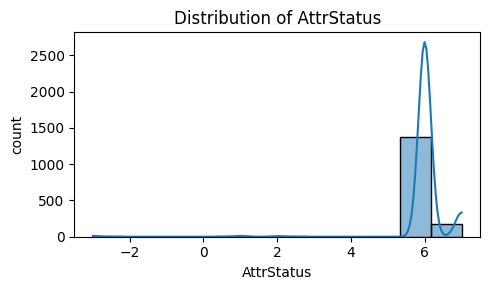

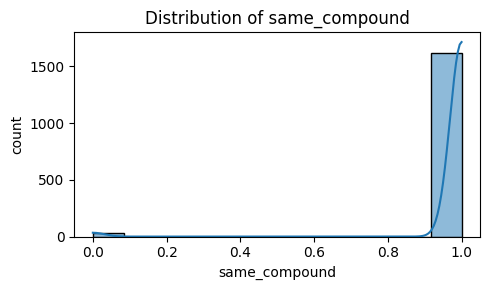

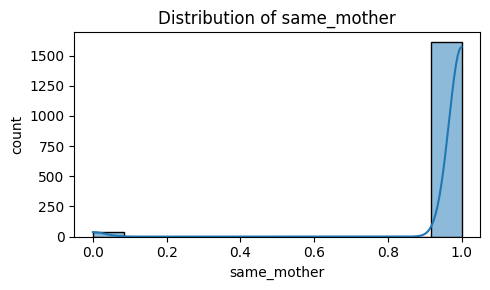

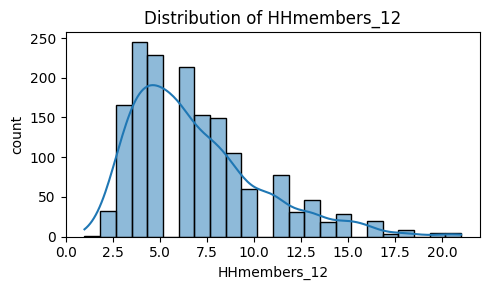

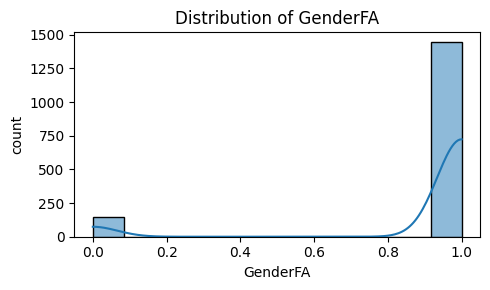

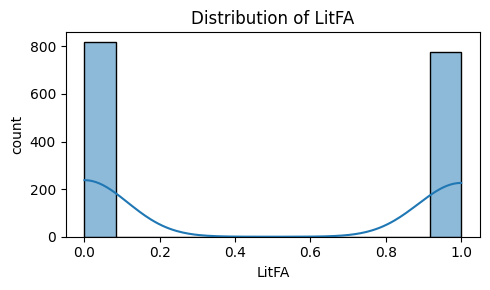

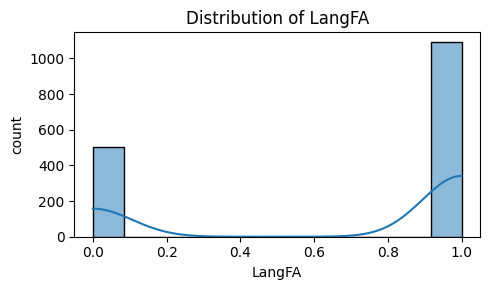

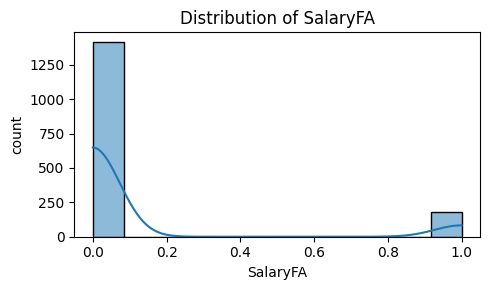

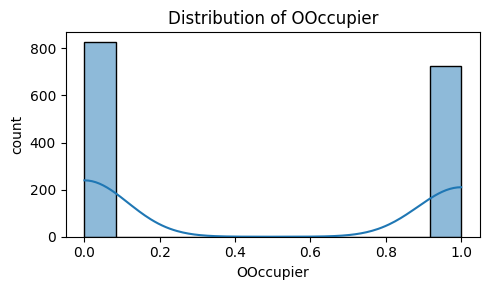

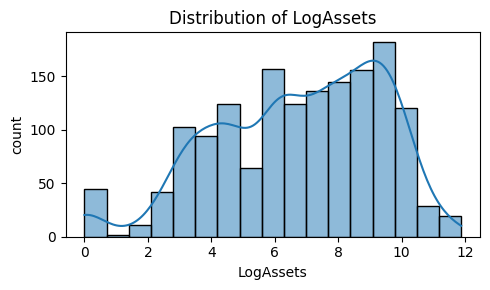

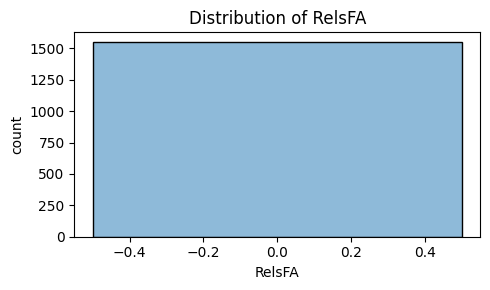

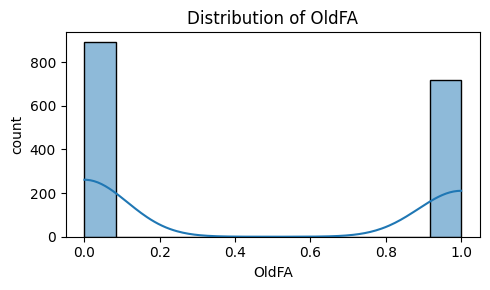

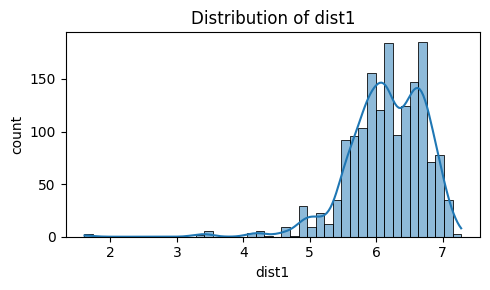

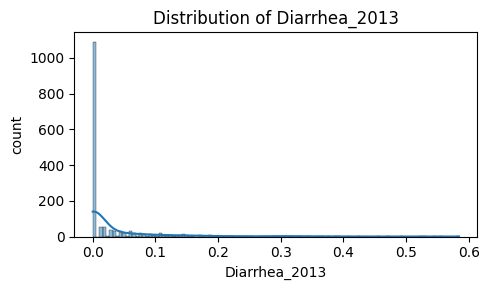

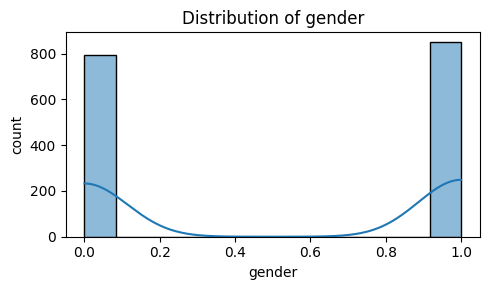

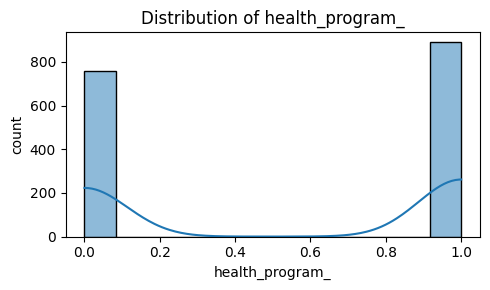

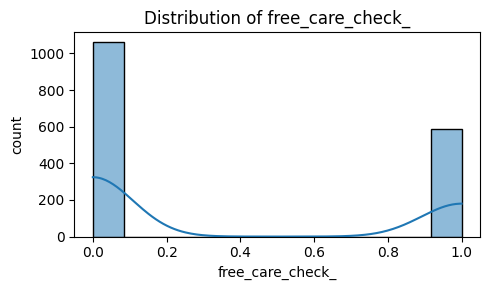

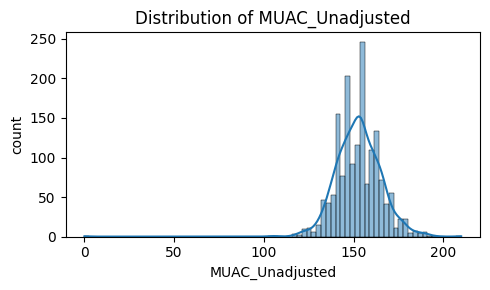

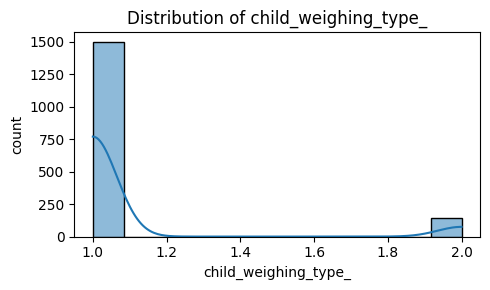

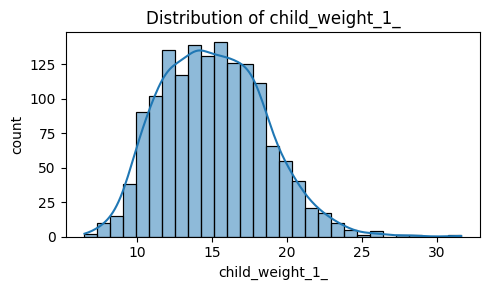

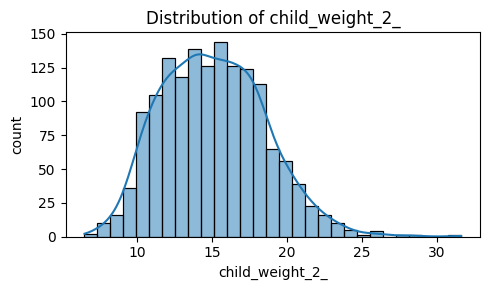

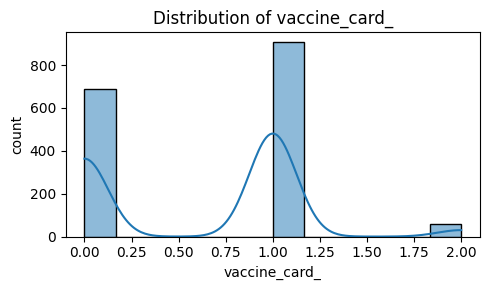

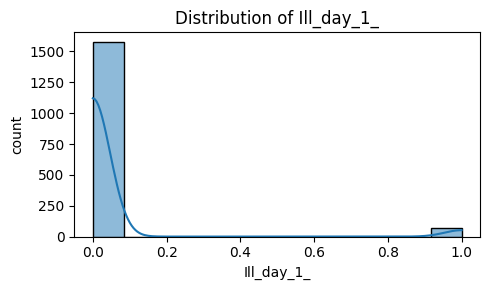

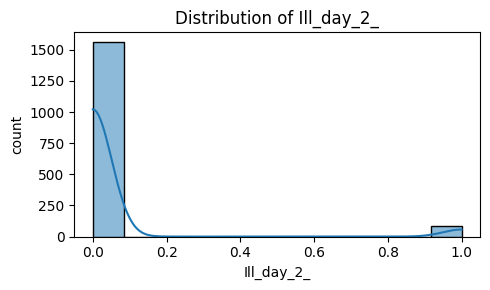

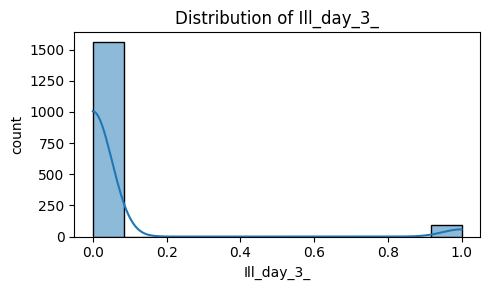

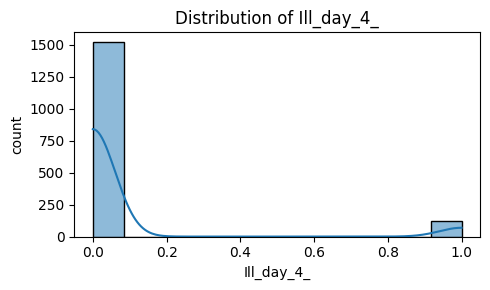

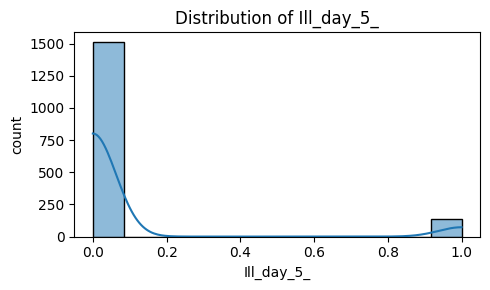

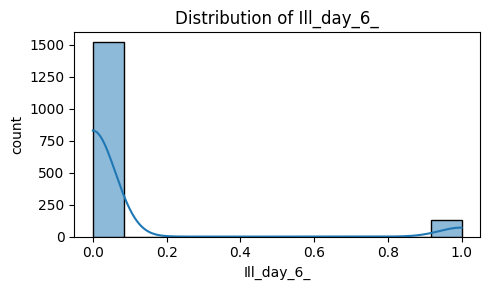

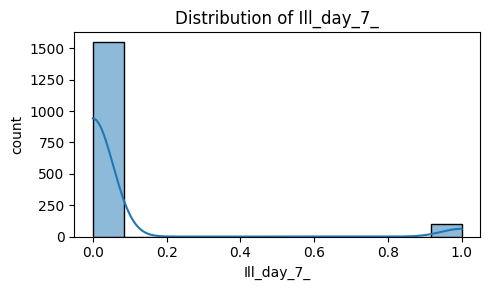

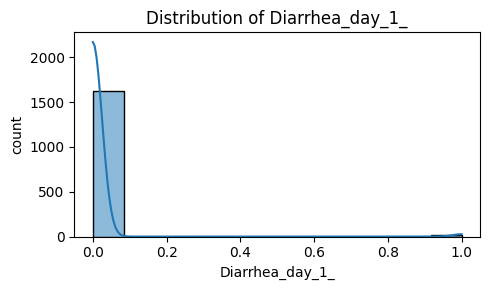

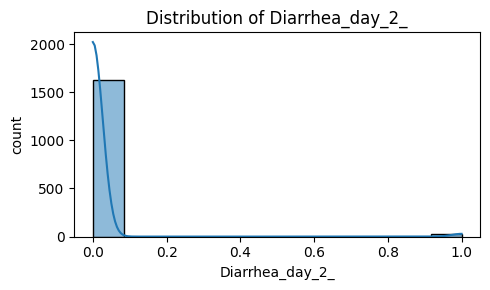

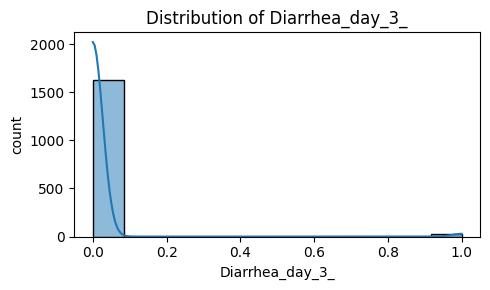

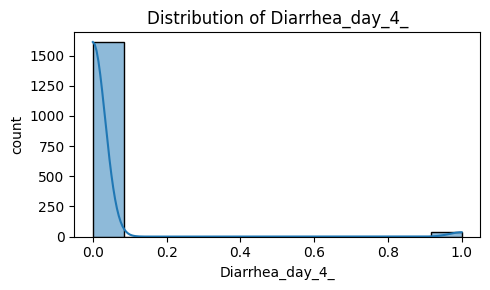

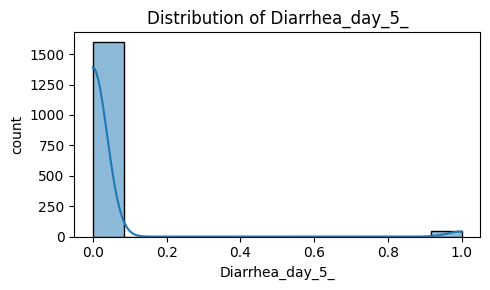

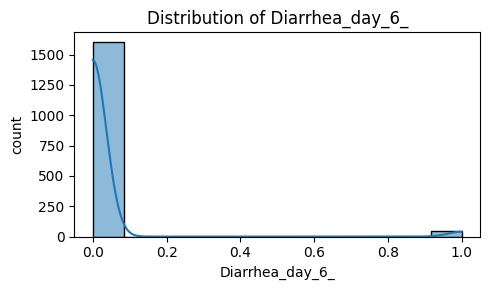

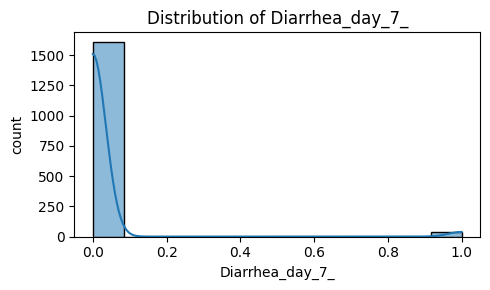

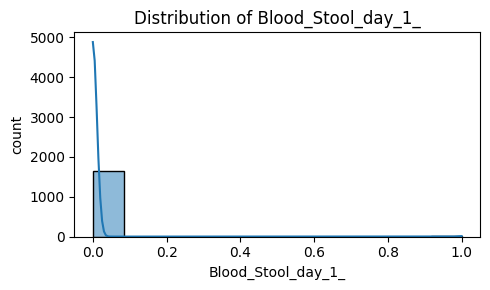

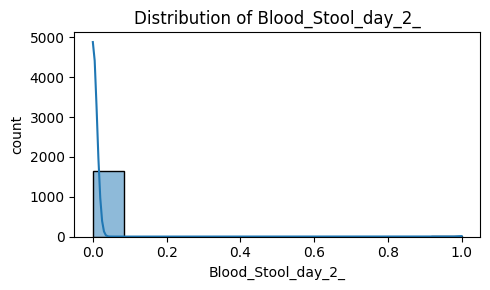

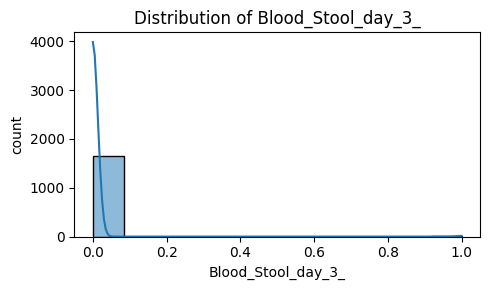

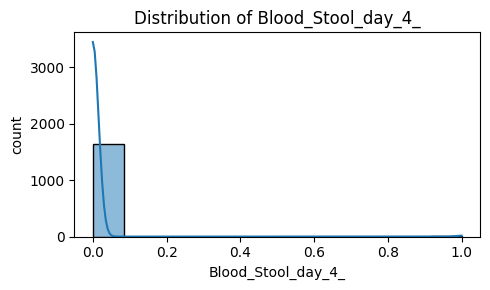

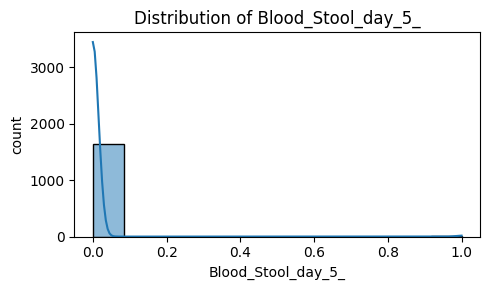

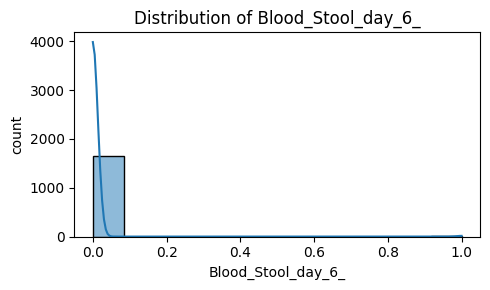

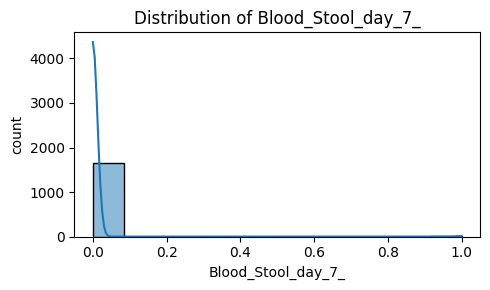

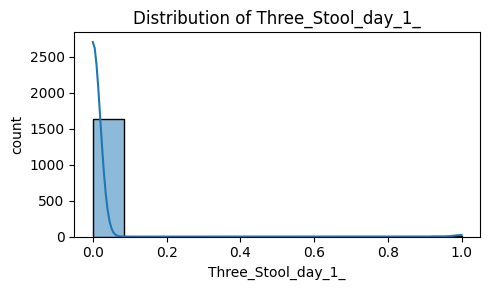

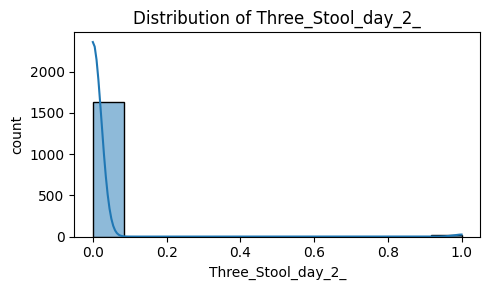

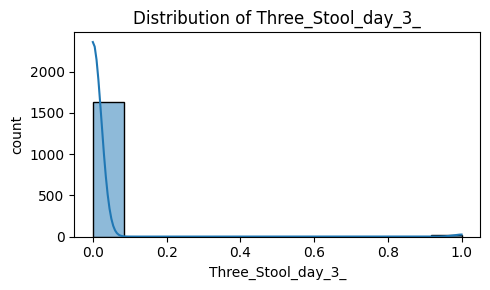

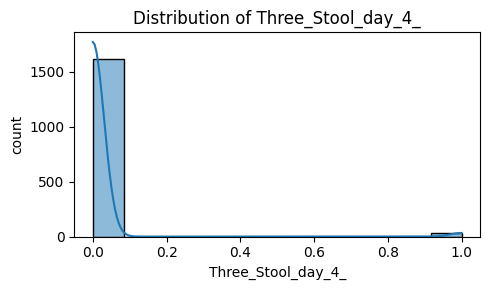

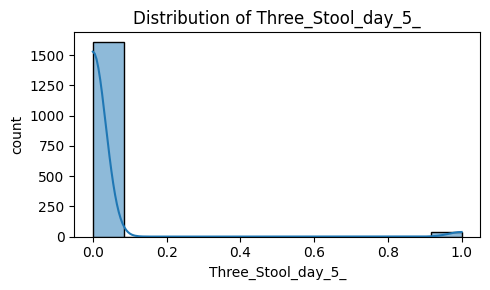

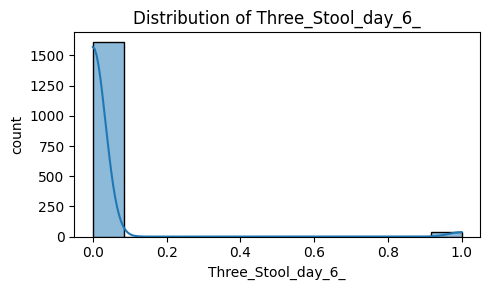

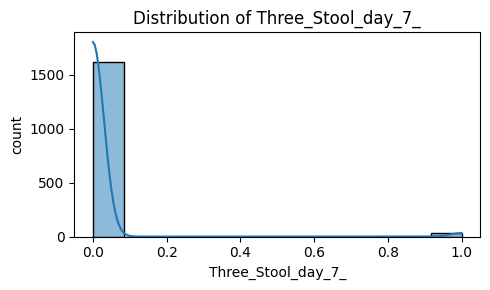

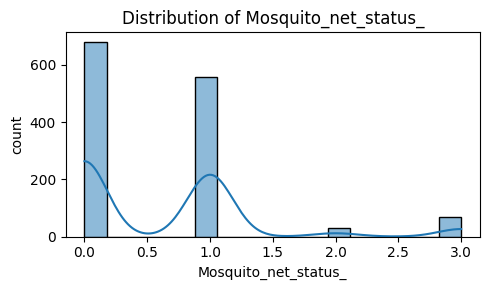

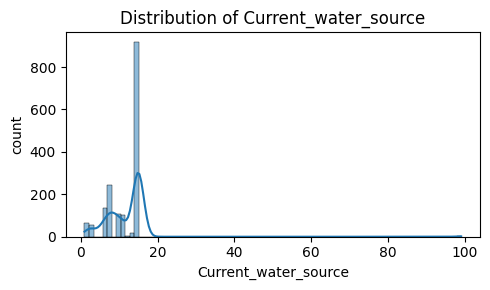

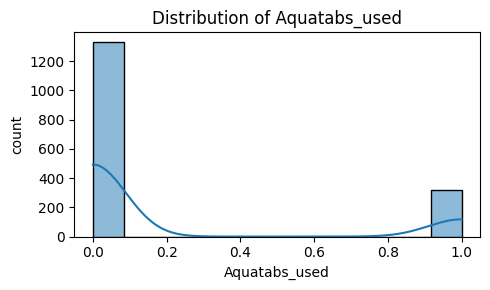

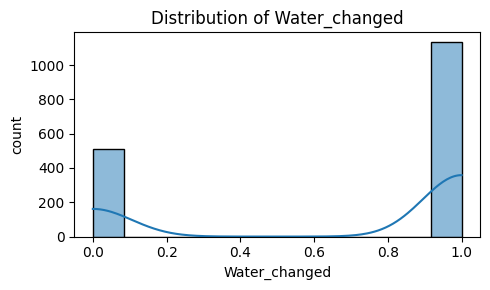

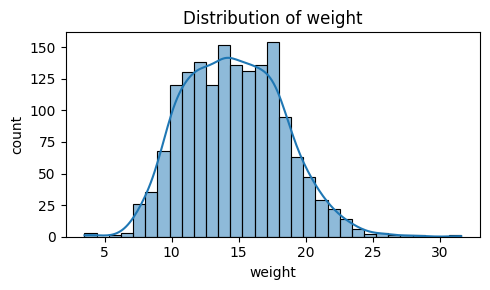

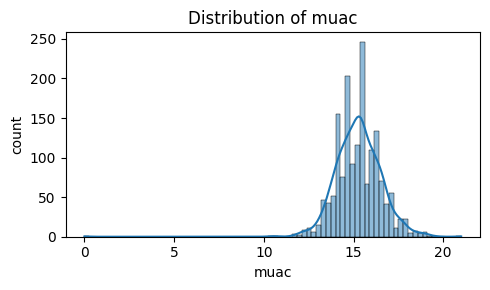

In [16]:
for cols in float_with_na:
    plt.figure(figsize=(5,3))
    sns.histplot(x=df_after_dropping_nan_morethan_30[cols],kde=True)
    plt.title(f"Distribution of {cols}")
    plt.xlabel(cols)
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()

In [17]:
for col in float_with_na:
    zero_ratio = (df_after_dropping_nan_morethan_30[col]==0).mean()
    print(f'{col}:{zero_ratio:.2f}')

consent:0.00
child_consent_:0.00
TrtOrder:0.00
TrtOrder2013:0.00
Treatment1:0.74
Treatment2:0.76
Treatment3:0.75
Treatment4:0.74
AttrStatus:0.00
same_compound:0.02
same_mother:0.02
HHmembers_12:0.00
GenderFA:0.09
LitFA:0.50
LangFA:0.31
SalaryFA:0.86
OOccupier:0.50
LogAssets:0.02
RelsFA:0.94
OldFA:0.54
dist1:0.00
Diarrhea_2013:0.66
gender:0.48
health_program_:0.46
free_care_check_:0.64
MUAC_Unadjusted:0.00
child_weighing_type_:0.00
child_weight_1_:0.00
child_weight_2_:0.00
vaccine_card_:0.42
Ill_day_1_:0.95
Ill_day_2_:0.95
Ill_day_3_:0.94
Ill_day_4_:0.92
Ill_day_5_:0.92
Ill_day_6_:0.92
Ill_day_7_:0.94
Diarrhea_day_1_:0.98
Diarrhea_day_2_:0.98
Diarrhea_day_3_:0.98
Diarrhea_day_4_:0.98
Diarrhea_day_5_:0.97
Diarrhea_day_6_:0.97
Diarrhea_day_7_:0.97
Blood_Stool_day_1_:1.00
Blood_Stool_day_2_:1.00
Blood_Stool_day_3_:0.99
Blood_Stool_day_4_:0.99
Blood_Stool_day_5_:0.99
Blood_Stool_day_6_:0.99
Blood_Stool_day_7_:0.99
Three_Stool_day_1_:0.99
Three_Stool_day_2_:0.99
Three_Stool_day_3_:0.99
Three

In [18]:
df_after_dropping_nan_morethan_30["Diarrhea_last_week_"].value_counts()

Diarrhea_last_week_
0    1550
1     102
Name: count, dtype: int64

In [19]:
def impute_float_by_skew_and_zero_ratio(df,skew_threshold=0.5,zero_threshold=0.3,verbose=True):
    df = df.copy()
    float_cols = df.select_dtypes(include='float').columns
    skew_vals = df[float_cols].skew()

    mean_cols = []
    median_cols = []

    for col in float_cols:
        if df[col].isna().sum()==0:
            continue

        skew = abs(skew_vals[col])
        zero_ratio = (df[col]==0).mean()

        if skew < skew_threshold or zero_ratio > zero_threshold:
            df[col]=df[col].fillna(df[col].mean())
            mean_cols.append(col)
        else:
            df[col]= df[col].fillna(df[col].median())
            median_cols.append(col)

    if verbose:
        print("\n Imputation Summary")
        print(f"\nMean Imputed columns : ({len(mean_cols)}) :{mean_cols}")
        print(f"\nMedian Imputed columns : ({len(median_cols)}) :{median_cols}")

    return df

In [20]:
df = impute_float_by_skew_and_zero_ratio(df_after_dropping_nan_morethan_30,skew_threshold=0.5,zero_threshold=0.3,verbose=True)


 Imputation Summary

Mean Imputed columns : (53) :['consent', 'TrtOrder', 'TrtOrder2013', 'Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'LitFA', 'LangFA', 'SalaryFA', 'OOccupier', 'LogAssets', 'RelsFA', 'OldFA', 'Diarrhea_2013', 'gender', 'health_program_', 'free_care_check_', 'child_weight_1_', 'child_weight_2_', 'vaccine_card_', 'Ill_day_1_', 'Ill_day_2_', 'Ill_day_3_', 'Ill_day_4_', 'Ill_day_5_', 'Ill_day_6_', 'Ill_day_7_', 'Diarrhea_day_1_', 'Diarrhea_day_2_', 'Diarrhea_day_3_', 'Diarrhea_day_4_', 'Diarrhea_day_5_', 'Diarrhea_day_6_', 'Diarrhea_day_7_', 'Blood_Stool_day_1_', 'Blood_Stool_day_2_', 'Blood_Stool_day_3_', 'Blood_Stool_day_4_', 'Blood_Stool_day_5_', 'Blood_Stool_day_6_', 'Blood_Stool_day_7_', 'Three_Stool_day_1_', 'Three_Stool_day_2_', 'Three_Stool_day_3_', 'Three_Stool_day_4_', 'Three_Stool_day_5_', 'Three_Stool_day_6_', 'Three_Stool_day_7_', 'Mosquito_net_status_', 'Aquatabs_used', 'Water_changed', 'weight']

Median Imputed columns : (11) :['child_consent_'

In [21]:
id_col = ["FPrimary","Person_ID","compound","Mother_ID","surveyor_ID","ageunit"]
df = df.drop(df[id_col],axis='columns')
df

,survey_date,consent,child_consent_,TrtOrder,TrtOrder2013,Treatment1,Treatment2,Treatment3,Treatment4,AttrStatus,...,Three_Stool_days_total,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
0,10/31/2014,1.0,9.0,1.0,1.000000,1.0,0.0,0.0,0.0,6.0,...,0,3,0,0,0,0,0,0,1,1
1,10/31/2014,1.0,9.0,1.0,1.000000,1.0,0.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,1,0,0
2,10/30/2014,1.0,9.0,1.0,1.000000,1.0,0.0,0.0,0.0,6.0,...,0,0,0,0,1,1,1,1,0,1
3,10/30/2014,1.0,9.0,1.0,1.000000,1.0,0.0,0.0,0.0,6.0,...,0,0,0,0,1,1,1,0,1,1
4,10/30/2014,1.0,9.0,1.0,1.000000,1.0,0.0,0.0,0.0,6.0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,11/5/2014,1.0,9.0,4.0,4.000000,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,1,1,1,0,0,1
1648,11/5/2014,1.0,9.0,4.0,4.000000,0.0,0.0,0.0,1.0,6.0,...,0,0,0,0,1,1,1,1,1,0
1649,11/2/2014,1.0,9.0,3.0,3.000000,0.0,0.0,1.0,0.0,6.0,...,0,0,0,0,1,1,0,0,1,1
1650,11/2/2014,1.0,9.0,3.0,2.507339,0.0,0.0,1.0,0.0,6.0,...,0,0,0,0,1,1,0,1,0,0


In [22]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df.isna().sum())

survey_date                     0
consent                         0
child_consent_                  0
TrtOrder                        0
TrtOrder2013                    0
Treatment1                      0
Treatment2                      0
Treatment3                      0
Treatment4                      0
AttrStatus                      0
In2014                          0
same_compound                   0
same_mother                     0
Stratum                         0
HHmembers_12                    0
GenderFA                        0
LitFA                           0
LangFA                          0
SalaryFA                        0
OOccupier                       0
LogAssets                       0
RelsFA                          0
OldFA                           0
dist1                           0
Diarrhea_2013                   0
age_2014                        0
ageyear_2014                    0
agegroup_2014                   0
age_2014_2                      0
age_2014_3    

In [23]:
df["survey_date"] = pd.to_datetime(df["survey_date"])


df.drop(["survey_date","child_consent_"],axis='columns',inplace=True)



In [24]:
correlation = df.corr(numeric_only=True)
correlation

,consent,TrtOrder,TrtOrder2013,Treatment1,Treatment2,Treatment3,Treatment4,AttrStatus,In2014,same_compound,...,Three_Stool_days_total,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
consent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TrtOrder,NaN,1.000000,0.978138,-0.779835,-0.252758,0.252700,0.777614,0.031348,NaN,-0.038592,...,-0.065855,-0.039055,-0.041329,-0.035953,0.078450,-0.012711,0.314476,-0.004322,0.007367,0.000676
TrtOrder2013,NaN,0.978138,1.000000,-0.761321,-0.246137,0.240563,0.764618,0.031833,NaN,-0.036979,...,-0.054005,-0.026328,-0.042501,-0.028001,0.071324,-0.007963,0.306505,-0.009769,0.001040,0.003274
Treatment1,NaN,-0.779835,-0.761321,1.000000,-0.330824,-0.335191,-0.342287,-0.000161,NaN,0.031787,...,0.047612,0.014295,0.036928,0.002753,-0.115387,-0.013313,-0.283972,-0.006229,-0.024677,-0.010798
Treatment2,NaN,-0.252758,-0.246137,-0.330824,1.000000,-0.324484,-0.331353,-0.035535,NaN,0.028330,...,0.009999,0.036843,0.009314,0.036400,0.084307,0.082497,0.112242,0.018984,0.034215,0.010315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Months_breastfeeding_correct,NaN,-0.012711,-0.007963,-0.013313,0.082497,-0.090373,0.021641,0.028739,NaN,0.004263,...,-0.020361,0.018456,-0.001133,0.005032,0.112305,1.000000,0.103858,-0.003609,-0.016404,-0.016269
ORT_ingr_correct,NaN,0.314476,0.306505,-0.283972,0.112242,-0.184107,0.355611,0.022931,NaN,0.052512,...,-0.017913,-0.002345,0.018491,-0.008059,0.129624,0.103858,1.000000,0.002606,0.008941,-0.014155
tag_HH,NaN,-0.004322,-0.009769,-0.006229,0.018984,-0.007560,-0.004956,-0.029876,NaN,0.004336,...,-0.022803,-0.006239,-0.061716,-0.023090,0.019416,-0.003609,0.002606,1.000000,0.141530,0.212607
tag_C,NaN,0.007367,0.001040,-0.024677,0.034215,-0.012465,0.003359,0.017132,NaN,0.003223,...,0.009697,0.014968,0.014271,0.031431,0.040540,-0.016404,0.008941,0.141530,1.000000,0.183578


In [25]:
target_col = "Diarrhea_last_week_"
x = df.drop(["Diarrhea_last_week_"],axis='columns')
y = df["Diarrhea_last_week_"]

In [26]:
corr_matrix = pd.concat([x,y],axis=1).corr(numeric_only=True)
target_corr = corr_matrix[target_col].abs().drop(index=target_col)

In [27]:
high_corr = target_corr[target_corr>0.3]
high_corr

Ill_last_week_                 0.434309
Ill_day_4_                     0.328754
Ill_day_5_                     0.344523
Ill_day_6_                     0.319722
Diarrhea_day_1_                0.433122
Diarrhea_day_2_                0.464901
Diarrhea_day_3_                0.464901
Diarrhea_day_4_                0.583258
Diarrhea_day_5_                0.676426
Diarrhea_day_6_                0.646422
Diarrhea_day_7_                0.623413
Three_Stool_day_1_             0.348021
Three_Stool_day_2_             0.398465
Three_Stool_day_3_             0.398465
Three_Stool_day_4_             0.531126
Three_Stool_day_5_             0.615194
Three_Stool_day_6_             0.599245
Three_Stool_day_7_             0.521719
Treatment_last_week_           0.358490
Pharmacy_Parterre_last_week    0.302307
Diarrhea_days_total            0.776932
Blood_Stool_days_total         0.303398
Three_Stool_days_total         0.703362
Ill_days_total                 0.322338
Blood_Stool_last_week          0.360390


In [28]:
leaky_keywords = ["day_","days_total","stool","ORT","symptom","diarrhea","treatment","blood","ill","_last_week"]
X_cleaned = x.drop(columns=[col for col in x.columns if any(k in col.lower() for k in leaky_keywords)])
X_cleaned

,consent,TrtOrder,TrtOrder2013,AttrStatus,In2014,same_compound,same_mother,Stratum,HHmembers_12,GenderFA,...,ORT_recipe,Months_breastfeeding,weight,muac,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
0,1.0,1.0,1.000000,6.0,1,1.0,1.0,1,5.0,1.0,...,0,7,12.100000,16.900000,0,0,0,0,1,1
1,1.0,1.0,1.000000,6.0,1,1.0,1.0,1,5.0,1.0,...,0,7,17.700001,16.400000,0,0,0,1,0,0
2,1.0,1.0,1.000000,6.0,1,1.0,1.0,16,3.0,1.0,...,1,6,15.800000,15.400000,1,1,1,1,0,1
3,1.0,1.0,1.000000,6.0,1,1.0,1.0,16,18.0,1.0,...,1,6,20.900000,16.600000,1,1,1,0,1,1
4,1.0,1.0,1.000000,6.0,1,1.0,1.0,16,18.0,1.0,...,1,7,14.500000,15.400000,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1.0,4.0,4.000000,2.0,1,1.0,1.0,8,7.0,1.0,...,1,6,17.200001,16.000000,1,1,1,0,0,1
1648,1.0,4.0,4.000000,6.0,1,1.0,1.0,8,7.0,1.0,...,1,6,14.600000,15.200000,1,1,1,1,1,0
1649,1.0,3.0,3.000000,6.0,1,1.0,1.0,7,6.0,0.0,...,0,6,22.500000,17.200001,1,1,0,0,1,1
1650,1.0,3.0,2.507339,6.0,1,1.0,1.0,7,6.0,0.0,...,0,6,12.200000,15.200000,1,1,0,1,0,0


In [29]:
corr_matrix = pd.concat([X_cleaned,y],axis=1).corr(numeric_only=True)
target_corr = corr_matrix[target_col].abs().drop(index=target_col)
high_corr = target_corr[target_corr>0.1]
high_corr

age_2014                0.189611
ageyear_2014            0.189611
agegroup_2014           0.213851
age_2014_2              0.167818
age_2014_3              0.147627
age_2014_4              0.129871
child_weighing_type_    0.159359
child_weight_1_         0.109668
child_weight_2_         0.109035
weight                  0.176774
Name: Diarrhea_last_week_, dtype: float64

In [30]:
X_cleaned.columns

Index(['consent', 'TrtOrder', 'TrtOrder2013', 'AttrStatus', 'In2014',
       'same_compound', 'same_mother', 'Stratum', 'HHmembers_12', 'GenderFA',
       'LitFA', 'LangFA', 'SalaryFA', 'OOccupier', 'LogAssets', 'RelsFA',
       'OldFA', 'dist1', 'age_2014', 'ageyear_2014', 'agegroup_2014',
       'age_2014_2', 'age_2014_3', 'age_2014_4', 'gender',
       'vaccine_card_available', 'child_present_', 'health_program_',
       'free_care_check_', 'MUAC_Unadjusted', 'child_weighing_type_',
       'child_weight_1_', 'child_weight_2_', 'vaccine_card_',
       'Mosquito_net_used_', 'Mosquito_net_status_', 'Current_water_source',
       'Changed_water_source', 'Aquatabs_used', 'Water_changed',
       'Measured_chlorine', 'ORT_recipe', 'Months_breastfeeding', 'weight',
       'muac', 'mosquito_net_correct', 'Months_breastfeeding_correct',
       'ORT_ingr_correct', 'tag_HH', 'tag_C', 'tag_M'],
      dtype='object')

In [31]:
X_f_cleaned = X_cleaned.drop(["consent","TrtOrder","AttrStatus","TrtOrder2013","In2014","Stratum","tag_HH", "tag_C", "tag_M"],axis=1)
X_f_cleaned

,same_compound,same_mother,HHmembers_12,GenderFA,LitFA,LangFA,SalaryFA,OOccupier,LogAssets,RelsFA,...,Aquatabs_used,Water_changed,Measured_chlorine,ORT_recipe,Months_breastfeeding,weight,muac,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct
0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,4.615120,0.0,...,0.0,0.0,0.05,0,7,12.100000,16.900000,0,0,0
1,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,4.615120,0.0,...,0.0,0.0,0.05,0,7,17.700001,16.400000,0,0,0
2,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,4.394449,0.0,...,0.0,0.0,0.05,1,6,15.800000,15.400000,1,1,1
3,1.0,1.0,18.0,1.0,1.0,1.0,0.0,1.0,9.250618,0.0,...,0.0,0.0,0.05,1,6,20.900000,16.600000,1,1,1
4,1.0,1.0,18.0,1.0,1.0,1.0,0.0,1.0,9.250618,0.0,...,0.0,0.0,0.20,1,7,14.500000,15.400000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1.0,1.0,7.0,1.0,1.0,0.0,0.0,0.0,6.481577,0.0,...,0.0,1.0,0.00,1,6,17.200001,16.000000,1,1,1
1648,1.0,1.0,7.0,1.0,1.0,0.0,0.0,0.0,6.481577,0.0,...,0.0,1.0,0.00,1,6,14.600000,15.200000,1,1,1
1649,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,5.673323,0.0,...,0.0,1.0,0.80,0,6,22.500000,17.200001,1,1,0
1650,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,5.673323,0.0,...,0.0,1.0,0.80,0,6,12.200000,15.200000,1,1,0


In [32]:
X_f_cleaned.columns

Index(['same_compound', 'same_mother', 'HHmembers_12', 'GenderFA', 'LitFA',
       'LangFA', 'SalaryFA', 'OOccupier', 'LogAssets', 'RelsFA', 'OldFA',
       'dist1', 'age_2014', 'ageyear_2014', 'agegroup_2014', 'age_2014_2',
       'age_2014_3', 'age_2014_4', 'gender', 'vaccine_card_available',
       'child_present_', 'health_program_', 'free_care_check_',
       'MUAC_Unadjusted', 'child_weighing_type_', 'child_weight_1_',
       'child_weight_2_', 'vaccine_card_', 'Mosquito_net_used_',
       'Mosquito_net_status_', 'Current_water_source', 'Changed_water_source',
       'Aquatabs_used', 'Water_changed', 'Measured_chlorine', 'ORT_recipe',
       'Months_breastfeeding', 'weight', 'muac', 'mosquito_net_correct',
       'Months_breastfeeding_correct', 'ORT_ingr_correct'],
      dtype='object')

In [33]:
(X_f_cleaned['vaccine_card_available']==X_f_cleaned['vaccine_card_']).value_counts()

True     1593
False      59
Name: count, dtype: int64

In [34]:
X_fe = X_f_cleaned.drop(["child_present_","same_mother","same_compound","vaccine_card_"],axis=1)

In [35]:
X_f = X_fe.drop(['age_2014','agegroup_2014', 'age_2014_2',
       'age_2014_3', 'age_2014_4'],axis=1)
X_f

,HHmembers_12,GenderFA,LitFA,LangFA,SalaryFA,OOccupier,LogAssets,RelsFA,OldFA,dist1,...,Aquatabs_used,Water_changed,Measured_chlorine,ORT_recipe,Months_breastfeeding,weight,muac,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct
0,5.0,1.0,1.0,1.0,0.0,0.0,4.615120,0.0,1.0,6.480044,...,0.0,0.0,0.05,0,7,12.100000,16.900000,0,0,0
1,5.0,1.0,1.0,1.0,0.0,0.0,4.615120,0.0,1.0,6.480044,...,0.0,0.0,0.05,0,7,17.700001,16.400000,0,0,0
2,3.0,1.0,1.0,1.0,0.0,0.0,4.394449,0.0,0.0,6.498282,...,0.0,0.0,0.05,1,6,15.800000,15.400000,1,1,1
3,18.0,1.0,1.0,1.0,0.0,1.0,9.250618,0.0,1.0,6.498282,...,0.0,0.0,0.05,1,6,20.900000,16.600000,1,1,1
4,18.0,1.0,1.0,1.0,0.0,1.0,9.250618,0.0,1.0,6.498282,...,0.0,0.0,0.20,1,7,14.500000,15.400000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,7.0,1.0,1.0,0.0,0.0,0.0,6.481577,0.0,1.0,6.354370,...,0.0,1.0,0.00,1,6,17.200001,16.000000,1,1,1
1648,7.0,1.0,1.0,0.0,0.0,0.0,6.481577,0.0,1.0,6.354370,...,0.0,1.0,0.00,1,6,14.600000,15.200000,1,1,1
1649,6.0,0.0,0.0,0.0,0.0,0.0,5.673323,0.0,0.0,6.109248,...,0.0,1.0,0.80,0,6,22.500000,17.200001,1,1,0
1650,6.0,0.0,0.0,0.0,0.0,0.0,5.673323,0.0,0.0,6.109248,...,0.0,1.0,0.80,0,6,12.200000,15.200000,1,1,0


In [36]:
df = pd.concat([X_f,y],axis=1)

In [37]:
df

,HHmembers_12,GenderFA,LitFA,LangFA,SalaryFA,OOccupier,LogAssets,RelsFA,OldFA,dist1,...,Water_changed,Measured_chlorine,ORT_recipe,Months_breastfeeding,weight,muac,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,Diarrhea_last_week_
0,5.0,1.0,1.0,1.0,0.0,0.0,4.615120,0.0,1.0,6.480044,...,0.0,0.05,0,7,12.100000,16.900000,0,0,0,0
1,5.0,1.0,1.0,1.0,0.0,0.0,4.615120,0.0,1.0,6.480044,...,0.0,0.05,0,7,17.700001,16.400000,0,0,0,0
2,3.0,1.0,1.0,1.0,0.0,0.0,4.394449,0.0,0.0,6.498282,...,0.0,0.05,1,6,15.800000,15.400000,1,1,1,0
3,18.0,1.0,1.0,1.0,0.0,1.0,9.250618,0.0,1.0,6.498282,...,0.0,0.05,1,6,20.900000,16.600000,1,1,1,0
4,18.0,1.0,1.0,1.0,0.0,1.0,9.250618,0.0,1.0,6.498282,...,0.0,0.20,1,7,14.500000,15.400000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,7.0,1.0,1.0,0.0,0.0,0.0,6.481577,0.0,1.0,6.354370,...,1.0,0.00,1,6,17.200001,16.000000,1,1,1,0
1648,7.0,1.0,1.0,0.0,0.0,0.0,6.481577,0.0,1.0,6.354370,...,1.0,0.00,1,6,14.600000,15.200000,1,1,1,0
1649,6.0,0.0,0.0,0.0,0.0,0.0,5.673323,0.0,0.0,6.109248,...,1.0,0.80,0,6,22.500000,17.200001,1,1,0,0
1650,6.0,0.0,0.0,0.0,0.0,0.0,5.673323,0.0,0.0,6.109248,...,1.0,0.80,0,6,12.200000,15.200000,1,1,0,0


In [38]:
df["child_weighing_type_"].value_counts()

child_weighing_type_
1.0    1506
2.0     146
Name: count, dtype: int64

In [64]:
x = df.drop(["Diarrhea_last_week_"],axis=1)
y = df["Diarrhea_last_week_"]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
non_numeric_col = x_train.select_dtypes(include="object").columns
non_numeric_col.tolist()

[]

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)

In [68]:
y_train.value_counts()

Diarrhea_last_week_
0    1241
1    1241
Name: count, dtype: int64

In [81]:
constant_filter = VarianceThreshold(threshold=0.0)
x_train_filtered = pd.DataFrame(
    constant_filter.fit_transform(x_train),
    columns=x_train.columns[constant_filter.get_support()]
)
x_train_filtered[["OOccupier"]]

,OOccupier
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
2477,0.0
2478,0.0
2479,0.0
2480,0.0


In [86]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(x_train_filtered[["OOccupier"]])

      OOccupier
0      1.000000
1      0.000000
2      0.000000
3      1.000000
4      0.000000
5      1.000000
6      0.000000
7      0.000000
8      1.000000
9      0.000000
10     0.000000
11     1.000000
12     0.000000
13     0.000000
14     1.000000
15     1.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     1.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
30     0.000000
31     1.000000
32     0.000000
33     0.000000
34     0.467482
35     0.000000
36     0.000000
37     1.000000
38     1.000000
39     0.000000
40     1.000000
41     0.000000
42     1.000000
43     1.000000
44     1.000000
45     0.000000
46     0.467482
47     0.000000
48     0.000000
49     0.000000
50     0.000000
51     0.000000
52     0.000000
53     0.000000
54     1.000000
55     1.000000
56     0.000000
57     0.000000
58     1.000000
59     0.000000
60     0.000000
61     0

In [44]:
x_test_filtered = pd.DataFrame(
    constant_filter.transform(x_test),
    columns = x_train_filtered.columns)

In [45]:
estimator = LogisticRegression(solver="liblinear")
selector = RFE(estimator=estimator, n_features_to_select=10)
x_train = selector.fit_transform(x_train_filtered,y_train)
x_test = selector.transform(x_test_filtered)
selected_features = x_train_filtered.columns[selector.get_support()]
selected_features

Index(['OOccupier', 'OldFA', 'ageyear_2014', 'vaccine_card_available',
       'child_weighing_type_', 'Changed_water_source', 'Aquatabs_used',
       'ORT_recipe', 'mosquito_net_correct', 'ORT_ingr_correct'],
      dtype='object')

In [46]:
pipeline = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('classifier',XGBClassifier(eval_metric='logloss', random_state=42))
])

In [47]:
# features = pipeline.named_steps["selector"]
# selected_features = x_train_filtered.columns[features.get_support()]
# selected_features

In [48]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [49]:
pipeline.score(x_test,y_test)

0.8549848942598187

In [50]:
params_dist = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 1.0],
    'classifier__colsample_bytree': [0.7, 1.0],
}


In [51]:
grid = GridSearchCV(pipeline,param_grid=params_dist,cv=StratifiedKFold(5),
                    scoring="accuracy",verbose=2,n_jobs=-1)

In [52]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logl...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.7, 1.0],
                         'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.7, 1.0]},
             scoring='accuracy', verbose=2)

In [53]:
grid.score(x_test,y_test)

0.8731117824773413

In [54]:
grid.best_params_

{'classifier__colsample_bytree': 0.7,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 100,
 'classifier__subsample': 0.7}

In [55]:
ypred = grid.predict(x_test)

In [56]:
cm = confusion_matrix(y_test,ypred)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       309
           1       0.17      0.23      0.19        22

    accuracy                           0.87       331
   macro avg       0.56      0.57      0.56       331
weighted avg       0.89      0.87      0.88       331



<Axes: >

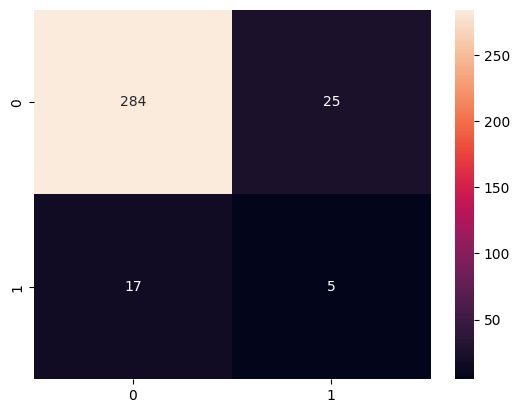

In [57]:
sns.heatmap(cm,annot=True,fmt="d")

In [60]:
import joblib
joblib.dump(grid,'capstone_project_1_mali.pkl')

['capstone_project_1_mali.pkl']